<a href="https://colab.research.google.com/github/ramon-campos/metodos-numericos-computacionais/blob/main/sistemas_numericos_sdv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métodos Numéricos Computacionais - APS (AV2)**

## **SVD (Imagens)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image

In [2]:
def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

## **Carregando uma imagem e transformando-a em uma matriz de valores reais:**

In [3]:
from skimage import io
from google.colab.patches import cv2_imshow

In [4]:
origem = "https://images.unsplash.com/photo-1573350289846-890d1c55df8f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=880&q=80"
icecream = io.imread(origem)

## **Fazendo a decomposição por valores singulares:**

In [5]:
icecream.shape

(880, 880, 3)

*Calculando 60%...*

In [6]:
k = np.ceil(0.6 * 800)
print(k)

480.0


*Calculando 70%...*

In [7]:
k = np.ceil(0.7 * 800)
print(k)

560.0


*Calculando 80%...*

In [8]:
k = np.ceil(0.8 * 800)
print(k)

640.0


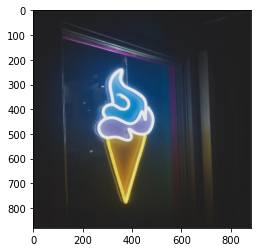

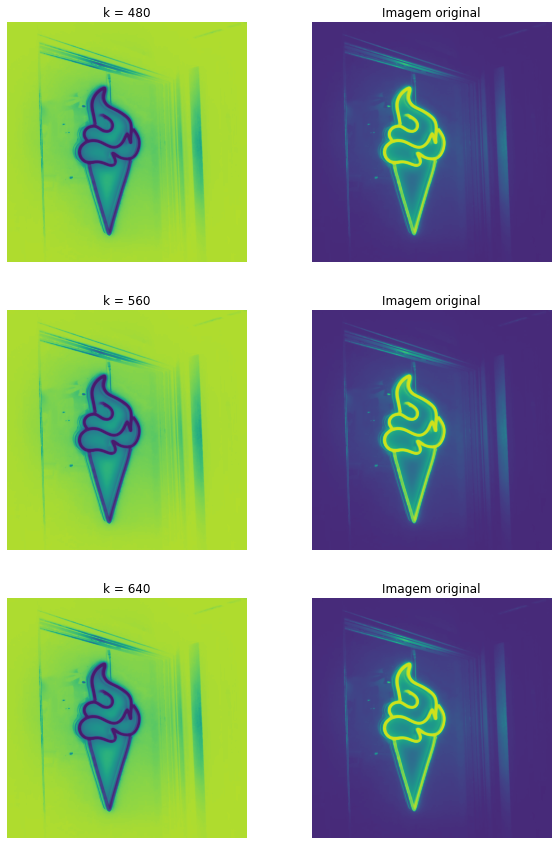

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from numpy.linalg import svd

plt.imshow(icecream)
# convert to grayscale
gray_icecream = rgb2gray(icecream)

# calculate the SVD and plot the image
U,S,V_T = svd(gray_icecream, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

curr_fig=0
for r in [480, 560, 640]:
  icecream_approx=U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
  ax[curr_fig][0].imshow(256-icecream_approx)
  ax[curr_fig][0].set_title("k = "+str(r))
  ax[curr_fig,0].axis('off')
  ax[curr_fig][1].set_title("Imagem original")
  ax[curr_fig][1].imshow(gray_icecream)
  ax[curr_fig,1].axis('off')
  curr_fig +=1
plt.show()

### **60%**

processing...
compressing...
dimensões do canal r: (880, 880)
arranging...


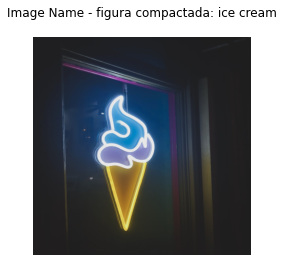

In [10]:
k = 480
compress_image("ice cream", icecream, k)

### **70%**

processing...
compressing...
dimensões do canal r: (880, 880)
arranging...


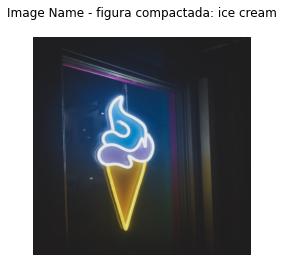

In [11]:
k = 560
compress_image("ice cream", icecream, k)

### **80%**

processing...
compressing...
dimensões do canal r: (880, 880)
arranging...


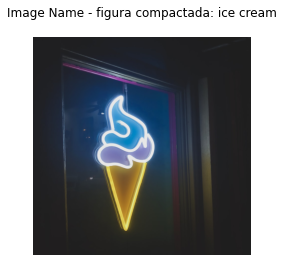

In [12]:
k = 640
compress_image("ice cream", icecream, k)